# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("E:\MCA\sem_3\ML_Lab\programs\week4\ccpp.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
x = df.drop(['PE'],axis = 1).values
x

array([[   8.34,   40.77, 1010.84,   90.01],
       [  23.64,   58.49, 1011.4 ,   74.2 ],
       [  29.74,   56.9 , 1007.15,   41.91],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [4]:
y = df['PE'].values
y

array([480.48, 445.75, 438.76, ..., 465.96, 450.93, 451.67])

In [5]:
x = pd.DataFrame(x)
x

,0,1,2,3
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [6]:
y = pd.DataFrame(y)
y

,0
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43
...,...
9563,462.59
9564,432.90
9565,465.96
9566,450.93


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [8]:
mlr = LinearRegression()

In [9]:
mlr.fit(x_train,y_train)

LinearRegression()

In [10]:
y_predict = mlr.predict(x_test)
y_predict

array([[435.84487386],
       [437.44757676],
       [461.25214944],
       ...,
       [450.97887433],
       [483.40680876],
       [435.47926756]])

In [11]:
#test_data
mlr.predict([[14.96,41.76,1024.07,73.17]])

array([[467.2114018]])

In [12]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 20.00
R-squared: 0.93


In [13]:
y_test = np.array(y_test).flatten()
y_predict = np.array(y_predict).flatten()
pred_y_df = pd.DataFrame({"Actual Values":y_test, "predicted values": y_predict, "Difference": y_test - y_predict})
pred_y_df

,Actual Values,predicted values,Difference
0,433.27,435.844874,-2.574874
1,438.16,437.447577,0.712423
2,458.42,461.252149,-2.832149
3,480.82,476.059882,4.760118
4,441.41,435.811718,5.598282
...,...,...,...
2866,480.31,480.039097,0.270903
2867,446.77,453.837232,-7.067232
2868,454.66,450.978874,3.681126
2869,483.77,483.406809,0.363191


In [14]:
mlr.coef_

array([[-1.98460442, -0.23146881,  0.05596081, -0.15973814]])

In [15]:
mlr.intercept_

array([460.94747177])

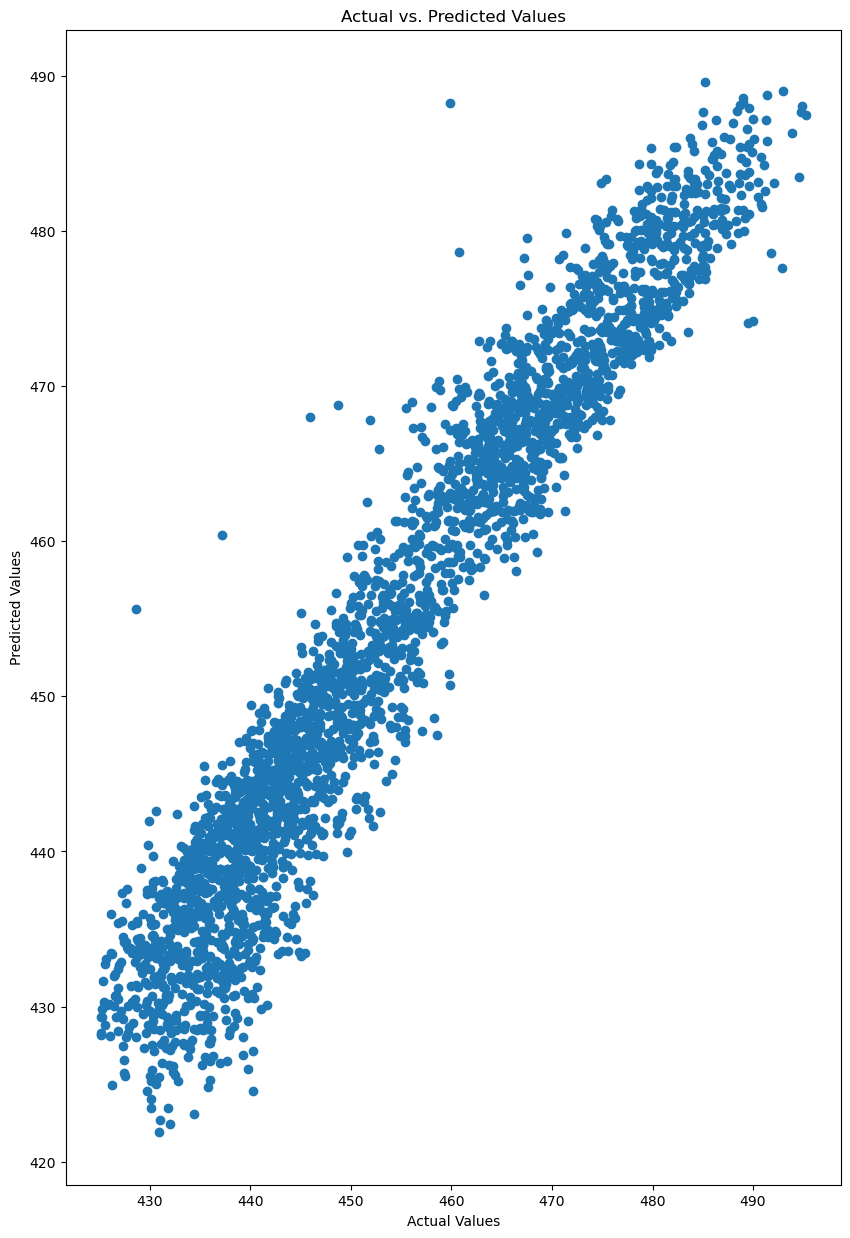

In [16]:
plt.figure(figsize=(10,15))
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

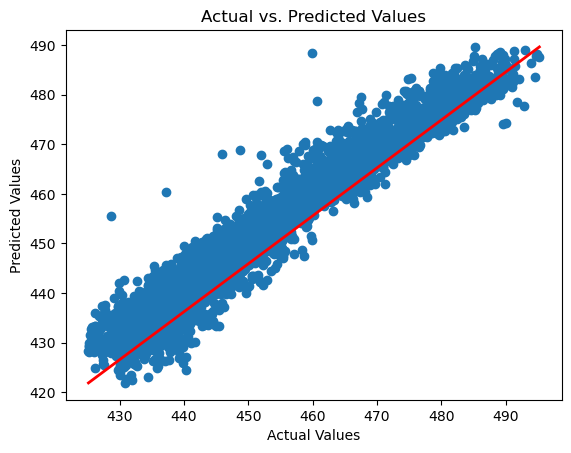

In [17]:
plt.scatter(y_test, y_predict)
plt.plot([min(y_test), max(y_test)], [min(y_predict), max(y_predict)], color='red', linewidth=2, label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()